In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=10)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = -4
    ymax = 8
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        lbf_nf[lbf_nf==inf]=ymax
        lbf_nf[lbf_nf==-inf]=ymin
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        lbf_af[lbf_af==inf]=ymax
        lbf_af[lbf_af==-inf]=ymin
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=4,prop={'size': 10})

## Data IONFR

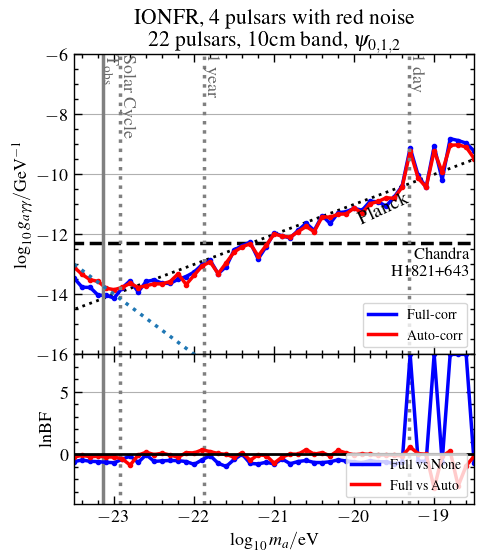

In [14]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-1.351, -1.694, -1.968, -2.126, -2.451, -2.601, -2.627, -2.588,
       -2.828, -2.868, -2.906, -3.007, -3.03 , -2.872, -3.329, -3.116,
       -2.912, -2.87 , -3.369, -3.109, -2.842, -2.774, -2.768, -3.278,
       -3.025, -2.741, -2.919, -3.051, -2.963, -2.894, -3.168, -2.77 ,
       -2.886, -2.886, -2.975, -2.878, -3.148, -2.935, -2.96 , -2.939,
       -3.053, -2.776, -1.686, -2.683, -3.085, -1.974, -2.779, -1.988,
       -2.072, -2.246, -2.732])



ul_full = np.array([-1.718, -2.12 , -2.226, -2.587, -2.69 , -2.881, -2.643, -2.501,
       -2.976, -2.727, -2.779, -2.986, -3.092, -3.055, -3.063, -3.013,
       -2.864, -2.823, -3.368, -3.231, -2.78 , -2.732, -2.718, -3.373,
       -3.067, -2.707, -2.91 , -3.074, -2.924, -2.785, -3.129, -2.733,
       -3.092, -2.836, -2.903, -2.889, -3.054, -2.85 , -2.973, -3.215,
       -3.014, -2.743, -1.581, -2.594, -3.093, -1.826, -3.032, -1.767,
       -1.929, -2.115, -2.482])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("IONFR, 4 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.212, -0.082, -0.192, -0.151, -0.206, -0.22 , -0.352, -0.859,
       -0.063,  0.169, -0.017,  0.092, -0.054, -0.229,  0.136,  0.111,
        0.36 ,  0.218,  0.069, -0.006, -0.234,  0.141, -0.478, -0.03 ,
       -0.098, -0.709, -0.209,  0.024,  0.009,  0.376,  0.014,  0.139,
       -0.121,  0.311,  0.111, -0.034,  0.029, -0.004, -0.056, -0.044,
       -0.067, -0.137,  0.582,  0.061,  0.011, -2.718, -0.136,  0.258,
       -2.532, -0.912, -0.149])

lbf_nf = np.array([-0.575, -0.457, -0.555, -0.583, -0.638, -0.668, -0.398, -0.132,
       -0.649, -0.028, -0.565, -0.517, -0.492, -0.501, -0.577, -0.802,
       -0.438, -0.101, -0.713, -0.971, -0.405,  0.014, -0.722, -0.77 ,
       -0.631, -0.765, -0.374, -0.75 , -0.574, -0.489, -0.653, -0.658, -0.593, -0.437, -0.534, -0.594,
       -0.664, -0.508, -0.595, -0.595, -0.756, -0.647,inf,-0.55808, -0.552,inf, -0.592,inf,inf,inf,-0.697420])

make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


In [97]:
crit = np.where(lbf_nf>10)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
crit

array([42, 45, 47, 48, 49])

## Data NO IONO

No handles with labels found to put in legend.


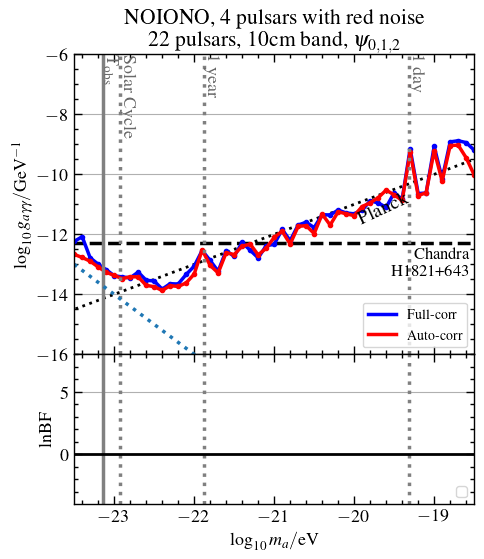

In [19]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-0.924, -1.127, -1.351, -1.643, -1.921, -2.124, -2.332, -2.369,
       -2.474, -2.856, -3.001, -3.227, -3.165, -3.294, -3.274, -3.082,
       -2.377, -2.992, -3.341, -2.766, -2.931, -2.75 , -2.78 , -3.241,
       -3.121, -2.861, -2.752, -3.279, -2.789, -2.867, -3.229, -2.683,
       -3.146, -2.803, -2.971, -3.133, -2.929, -2.904, -2.835, -2.681,
       -2.941, -3.227, -1.715, -3.263, -3.269, -1.967, -3.08 , -1.995,
       -2.082, -2.603, -3.274])



ul_full = np.array([-0.493, -0.434, -1.239, -1.55 , -1.834, -2.135, -2.275, -2.408,
       -2.315, -2.687, -2.811, -3.183, -3.101, -3.212, -2.994, -2.819,
       -2.395, -2.827, -3.286, -2.695, -2.993, -2.626, -2.985, -3.341,
       -3.035, -3.089, -2.692, -3.167, -2.745, -2.753, -3.032, -2.7  ,
       -2.811, -2.746, -2.944, -3.071, -3.049, -2.839, -3.009, -3.256,
       -2.87 , -3.185, -1.606, -3.197, -3.277, -1.825, -3.003, -1.874,
       -1.936, -2.097, -2.449])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("NOIONO, 4 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

#lbf_af = np.

#lbf_nf = 

make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


# Mock Data

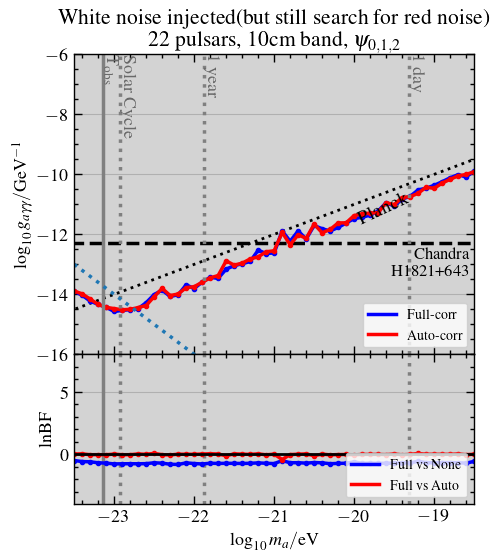

In [16]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.142, -2.341, -2.613, -2.892, -3.088, -3.231, -3.369, -3.456,
       -3.497, -3.528, -3.332, -3.158, -3.496, -3.544, -3.433, -3.501,
       -3.453, -3.406, -3.429, -3.041, -3.281, -3.317, -3.276, -3.307,
       -3.236, -3.304, -2.792, -3.304, -3.07 , -3.29 , -2.918, -3.304,
       -3.293, -3.176, -3.271, -3.129, -3.176, -3.249, -3.331, -3.101,
       -3.264, -3.128, -3.2  , -3.187, -3.085, -3.223, -3.147, -3.122,
       -3.105, -3.159, -3.169])

ul_full = np.array([-2.154, -2.386, -2.681, -2.892, -3.089, -3.326, -3.394, -3.464,
       -3.532, -3.434, -3.262, -3.217, -3.526, -3.572, -3.338, -3.563,
       -3.447, -3.39 , -3.524, -3.315, -3.301, -3.337, -3.361, -3.085,
       -3.295, -3.377, -2.741, -3.186, -2.941, -3.315, -2.961, -3.17 ,
       -3.343, -3.327, -3.277, -3.232, -3.287, -3.315, -3.278, -3.098,
       -3.315, -3.177, -3.19 , -3.074, -3.118, -3.122, -3.102, -3.071,
       -3.066, -3.248, -3.139])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("White noise injected(but still search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 0.029,  0.04 , -0.028, -0.025, -0.032,  0.022, -0.031, -0.026,
        0.034,  0.001,  0.079, -0.027, -0.045,  0.012,  0.008,  0.004,
        0.026,  0.049,  0.027, -0.113,  0.041,  0.016, -0.003,  0.041,
       -0.038,  0.019, -0.414, -0.017,  0.012,  0.037, -0.109,  0.02 ,
       -0.04 , -0.018, -0.01 , -0.047, -0.004, -0.007, -0.003, -0.023,
        0.031, -0.037,  0.001,  0.07 ,  0.009,  0.009,  0.005,  0.002,
        0.036, -0.028,  0.01 ])




lbf_nf = np.array([-0.493, -0.577, -0.597, -0.673, -0.704, -0.764, -0.754, -0.748,
       -0.755, -0.743, -0.674, -0.704, -0.79 , -0.81 , -0.68 , -0.735,
       -0.769, -0.712, -0.728, -0.717, -0.722, -0.73 , -0.715, -0.682,
       -0.715, -0.739, -0.503, -0.67 , -0.668, -0.704, -0.654, -0.679,
       -0.748, -0.724, -0.712, -0.608, -0.714, -0.7  , -0.716, -0.713,
       -0.7  , -0.683, -0.678, -0.556, -0.666, -0.675, -0.661, -0.664,
       -0.673, -0.705, -0.561])


axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/mock1.jpg")


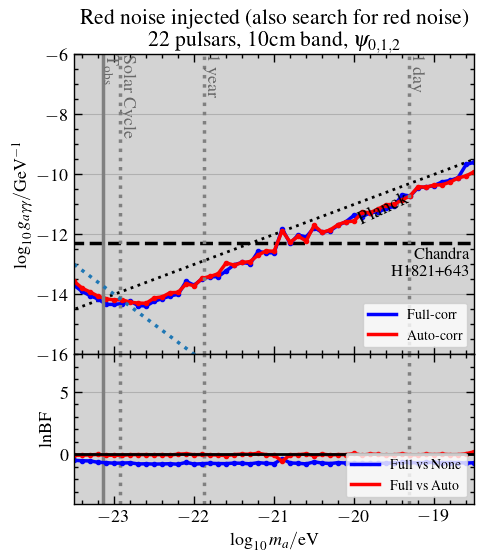

In [17]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.823, -2.151, -2.381, -2.619, -2.812, -2.94 , -3.039, -3.218,
       -3.347, -3.455, -3.377, -3.441, -3.401, -3.491, -3.306, -3.468,
       -3.321, -3.361, -3.368, -3.108, -3.283, -3.294, -3.363, -3.247,
       -3.207, -3.321, -2.732, -3.218, -3.122, -3.37 , -2.96 , -3.292,
       -3.309, -3.232, -3.236, -3.313, -3.118, -3.233, -3.214, -3.17 ,
       -3.254, -3.205, -3.174, -2.966, -3.087, -3.112, -3.204, -3.215,
       -3.174, -3.21 , -3.167])

ul_full = np.array([-1.957, -2.26 , -2.501, -2.714, -2.992, -3.091, -3.163, -3.182,
       -3.432, -3.543, -3.487, -3.499, -3.511, -3.553, -3.223, -3.454,
       -3.335, -3.372, -3.466, -3.374, -3.272, -3.293, -3.434, -3.126,
       -3.27 , -3.372, -2.669, -3.261, -3.077, -3.245, -3.031, -3.292,
       -3.336, -3.255, -3.23 , -3.119, -3.27 , -3.23 , -3.312, -3.291,
       -3.325, -3.036, -3.178, -2.997, -3.077, -3.13 , -3.108, -3.161,
       -3.166, -2.826, -2.855])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Red noise injected (also search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.066, -0.068, -0.039, -0.008, -0.079, -0.068, -0.084, -0.025,
       -0.024, -0.024, -0.036, -0.022, -0.047,  0.01 ,  0.048, -0.034,
       -0.012, -0.034, -0.058, -0.095, -0.019,  0.019,  0.007,  0.089,
       -0.025, -0.07 , -0.553, -0.027, -0.022,  0.034, -0.107,  0.017,
       -0.05 , -0.019, -0.025,  0.069, -0.069,  0.029, -0.006, -0.047,
       -0.037,  0.029, -0.039, -0.048,  0.015, -0.023,  0.014, -0.025,
       -0.019,  0.047,  0.209])




lbf_nf = np.array([-0.478, -0.511, -0.528, -0.638, -0.665, -0.709, -0.695, -0.673,
       -0.766, -0.754, -0.779, -0.767, -0.748, -0.791, -0.642, -0.779,
       -0.745, -0.715, -0.738, -0.743, -0.7  , -0.717, -0.757, -0.665,
       -0.717, -0.749, -0.352, -0.69 , -0.713, -0.766, -0.601, -0.696,
       -0.735, -0.663, -0.694, -0.714, -0.71 , -0.717, -0.713, -0.714,
       -0.673, -0.643, -0.644, -0.694, -0.647, -0.646, -0.666, -0.655,
       -0.656, -0.7  , -0.67 ])


axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/mock1.jpg")


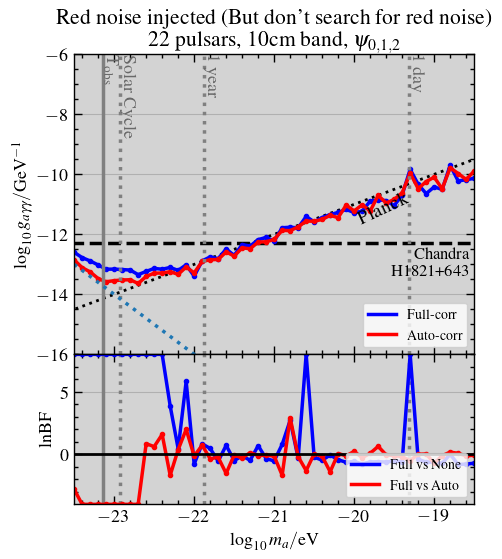

In [18]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.108, -1.466, -1.708, -2.029, -2.236, -2.3  , -2.377, -2.469,
       -2.694, -2.559, -2.551, -2.644, -2.702, -2.889, -2.747, -3.04 ,
       -2.761, -2.802, -2.894, -2.741, -2.982, -2.807, -2.936, -2.813,
       -2.904, -2.926, -2.723, -2.833, -2.807, -2.713, -2.82 , -2.858,
       -2.825, -2.998, -2.682, -2.976, -2.87 , -3.18 , -2.757, -3.114,
       -3.093, -2.973, -2.414, -3.031, -2.899, -2.85 , -3.338, -2.737,
       -3.028, -3.327, -3.148])

ul_full = np.array([-0.855, -1.132, -1.343, -1.577, -1.818, -1.915, -2.029, -2.146,
       -2.399, -2.393, -2.392, -2.518, -2.56 , -2.758, -2.672, -3.15 ,
       -2.74 , -2.709, -2.867, -2.645, -2.961, -2.696, -2.848, -2.732,
       -2.758, -2.978, -2.636, -2.719, -2.839, -2.56 , -2.841, -2.796,
       -2.796, -2.826, -2.825, -3.031, -3.086, -2.847, -2.905, -3.031,
       -3.299, -3.042, -2.29 , -2.89 , -3.299, -3.176, -3.36 , -2.654,
       -3.276, -3.335, -3.39 ])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Red noise injected (But don't search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-2.799,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,
         -inf,  0.853,  0.619,  1.591, -1.677,  0.378,  1.997, -0.131,
        0.723, -0.351, -0.238, -1.528, -0.053, -0.303,  0.135, -0.093,
       -0.067, -0.141, -1.67 ,  2.932, -0.189, -1.3  ,  0.045, -0.159,
       -1.393,  0.064, -0.113,  0.236, -0.268,  0.083,  0.636, -0.043,
       -0.093, -0.195, -0.506,  0.01 ,  0.035, -0.713, -0.106,  0.179,
        0.082, -0.125, -0.064])




lbf_nf = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
          inf,    inf,    inf,    inf,  3.883,  0.453,  5.836, -0.775,
        0.841,  0.473, -0.551,  0.72 , -0.499, -0.132, -0.472,  0.694,
       -0.346, -0.522,  0.792,  2.723, -0.312,    inf, -0.226, -0.467,
       -0.056, -0.434, -0.635, -0.565, -0.774, -0.612, -0.585, -0.619,
       -0.524, -0.601,    inf, -0.405, -0.62 , -0.623, -0.724,  0.011,
       -0.812, -0.777, -0.709])


axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/mock1.jpg")


In [72]:
crit = np.where(lbf_nf>10)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
crit

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 29, 42])

In [74]:
l10ma[22]

-21.3

## -23.0

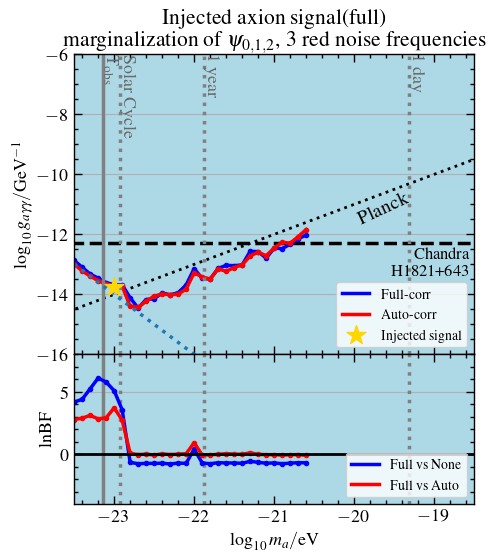

In [12]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,30)*0.1 -23.5


ul_auto = np.array([-1.247, -1.576, -1.848, -2.099, -2.317, -2.467, -2.579, -3.358,
       -3.486, -3.386, -3.314, -3.348, -3.469, -3.552, -3.479, -3.034,
       -3.275, -3.445, -3.204, -3.389, -3.362, -3.374, -3.175, -3.15 ,
       -3.369, -3.212, -3.118, -3.251, -3.133, -2.995])

ul_full = np.array([-1.125, -1.454, -1.781, -2.016, -2.264, -2.437, -2.537, -3.074,
       -3.514, -3.33 , -3.401, -3.31 , -3.471, -3.502, -3.344, -2.899,
       -3.325, -3.448, -3.191, -3.189, -3.3  , -3.375, -3.023, -3.131,
       -3.451, -3.214, -3.333, -3.285, -3.207, -3.178])


axes[0].scatter(-23,l10S_to_l10ga(-2.5,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 2.785e+00,  2.895e+00,  3.115e+00,  2.838e+00,  2.929e+00,
        3.715e+00,  2.742e+00,  8.263e-02, -1.916e-02,  1.790e-02,
       -5.611e-02,  3.892e-02, -1.718e-02,  1.482e-02,  5.375e-02,
        9.312e-01, -5.362e-02, -3.660e-02,  2.021e-03,  5.851e-02,
        2.321e-02,  3.748e-03,  1.222e-01,  5.138e-03, -2.961e-02,
       -2.337e-02, -6.189e-02, -2.931e-02, -1.942e-02, -8.267e-02])


lbf_nf = np.array([ 4.182,  4.402,  5.248,  6.101,  5.784,  5.093,  3.566, -0.644,
       -0.749, -0.722, -0.725, -0.709, -0.768, -0.704, -0.718,  0.426,
       -0.688, -0.752, -0.669, -0.687, -0.692, -0.717, -0.555, -0.64 ,
       -0.709, -0.687, -0.751, -0.704, -0.669, -0.675])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock1.jpg")


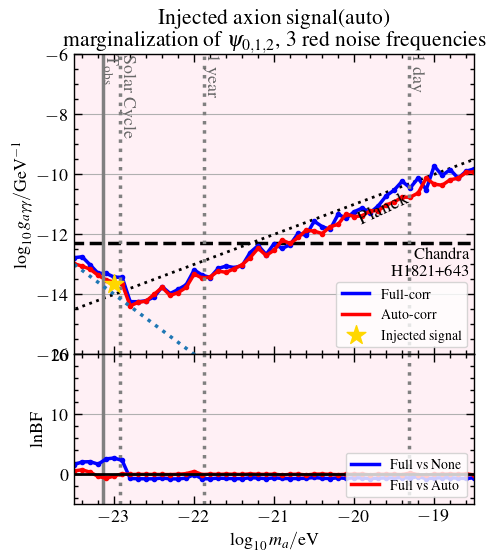

In [26]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.236, -1.415, -1.618, -1.922, -2.176, -2.351, -2.508, -3.339,
       -3.324, -3.382, -3.255, -3.126, -3.492, -3.499, -3.426, -3.08 ,
       -3.314, -3.379, -3.278, -3.424, -3.401, -3.369, -3.231, -3.022,
       -3.361, -3.283, -3.051, -3.261, -3.159, -3.021, -3.149, -3.329,
       -3.203, -3.22 , -2.977, -3.162, -3.24 , -3.172, -3.267, -3.177,
       -3.176, -3.118, -3.219, -3.177, -2.785, -3.083, -3.219, -3.136,
       -3.186, -3.094, -3.171])

ul_full = np.array([-1.034, -1.104, -1.475, -1.857, -1.957, -2.183, -2.288, -3.2  ,
       -3.301, -3.37 , -3.343, -3.103, -3.428, -3.394, -3.337, -2.942,
       -3.215, -3.395, -3.192, -3.213, -3.363, -3.4  , -3.062, -2.929,
       -3.328, -3.066, -3.326, -3.3  , -3.02 , -3.19 , -2.818, -3.098,
       -3.29 , -2.886, -3.125, -3.002, -2.983, -3.233, -3.11 , -2.875,
       -2.781, -2.586, -2.911, -2.679, -3.171, -2.475, -2.893, -2.798,
       -3.184, -3.051, -3.074])


axes[0].scatter(-23,l10S_to_l10ga(-2.4,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lavenderblush')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(auto)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 0.567,  0.764,  0.349, -0.335, -0.658, -0.274,  0.087, -0.024,
       -0.006, -0.003, -0.013, -0.021, -0.038,  0.012,  0.118,  0.474,
       -0.034,  0.034, -0.01 ,  0.042,  0.014, -0.023,  0.079,  0.007,
       -0.01 ,  0.029, -0.108, -0.003,  0.018, -0.095,  0.027,  0.053,
       -0.007, -0.055, -0.003,  0.033,  0.04 , -0.071,  0.018,  0.019,
        0.017, -0.037,  0.224, -0.055, -0.115,  0.014,  0.02 ,  0.059,
        0.005,  0.063, -0.082])



lbf_nf = np.array([ 1.624,  2.073,  2.11 ,  1.698,  2.578,  2.722,  2.314, -0.688,
       -0.729, -0.742, -0.743, -0.612, -0.747, -0.763, -0.624, -0.038,
       -0.742, -0.732, -0.627, -0.68 , -0.705, -0.728, -0.563, -0.611,
       -0.722, -0.574, -0.688, -0.703, -0.686, -0.648, -0.522, -0.656,
       -0.697, -0.576, -0.682, -0.576, -0.601, -0.707, -0.642, -0.595,
       -0.612, -0.532, -0.627, -0.359, -0.72 , -0.615, -0.576, -0.572,
       -0.647, -0.69 , -0.572])


axes[1].set_facecolor('lavenderblush')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock2.jpg")


array([], shape=(0, 3), dtype=float64)

## -22.0

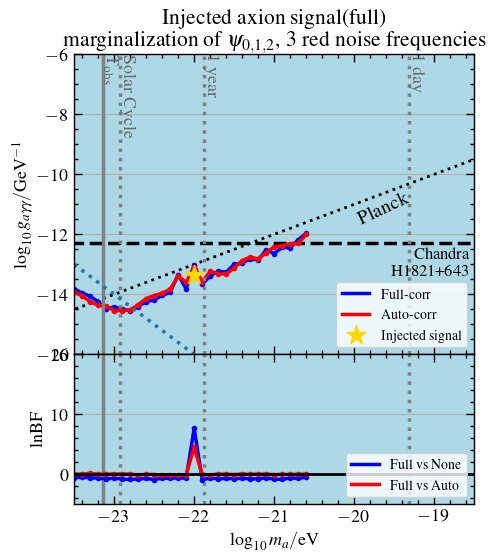

In [27]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,30)*0.1 -23.5


ul_auto = np.array([-2.17 , -2.411, -2.697, -2.923, -3.05 , -3.296, -3.398, -3.478,
       -3.402, -3.295, -3.297, -3.321, -3.281, -2.954, -3.254, -2.843,
       -3.44 , -3.194, -3.362, -3.482, -3.382, -3.229, -3.215, -3.372,
       -3.271, -3.172, -3.239, -3.269, -3.361, -3.159])

ul_full = np.array([-2.072, -2.312, -2.522, -2.803, -3.135, -3.184, -3.339, -3.506,
       -3.462, -3.4  , -3.437, -3.392, -3.388, -2.899, -3.47 , -2.775,
       -3.521, -3.344, -3.287, -3.42 , -3.26 , -3.32 , -3.268, -3.414,
       -3.172, -3.397, -3.292, -3.403, -3.244, -3.122])


axes[0].scatter(-22,l10S_to_l10ga(-3.1,-22),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 5.210e-02,  3.616e-02,  1.735e-01,  1.960e-02,  3.113e-02,
        5.986e-02,  9.045e-02,  1.600e-02, -8.230e-02, -1.180e-03,
       -2.712e-02, -1.768e-01, -8.871e-02, -1.241e-01, -5.599e-02,
        np.log(1.6813)+4, -1.290e-02, -9.113e-02,  4.910e-02,  3.365e-02,
       -3.885e-02,  5.949e-02,  1.042e-02,  4.211e-02,  3.059e-02,
       -3.411e-02, -8.377e-03, -2.402e-02, -2.614e-03,  6.018e-02])


lbf_nf = np.array([-0.528, -0.508, -0.542, -0.666, -0.74 , -0.649, -0.793, -0.846,
       -0.766, -0.684, -0.866, -0.633, -0.686, -0.551, -0.676,    np.log(38.7222)+4,
       -0.874, -0.65 , -0.738, -0.673, -0.751, -0.637, -0.771, -0.752,
       -0.589, -0.8  , -0.831, -0.6  , -0.689, -0.471])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock3.jpg")


## -21.0

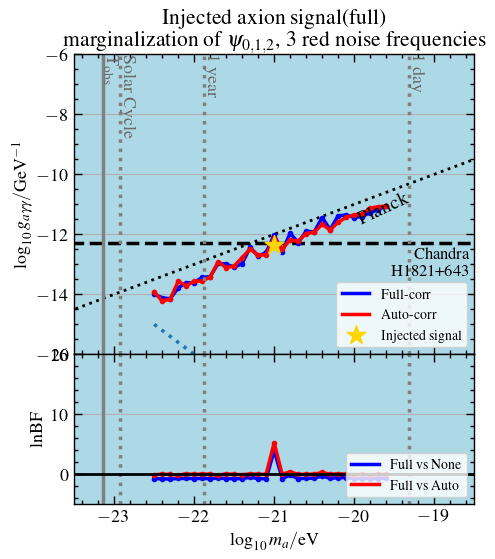

In [28]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(10,40)*0.1 -23.5


ul_auto = np.array([-3.169, -3.582, -3.617, -3.123, -3.369, -3.324, -3.419, -3.376,
       -2.971, -3.265, -3.314, -3.128, -2.948, -3.248, -3.338, -2.863,
       -3.354, -3.136, -3.284, -3.13 , -3.185, -3.023, -3.31 , -3.152,
       -3.087, -3.107, -3.191, -3.082, -3.135, -3.21 ])

ul_full = np.array([-3.248, -3.47 , -3.604, -3.342, -3.273, -3.364, -3.291, -3.364,
       -3.024, -3.145, -3.352, -3.328, -2.887, -3.284, -3.258, -2.774,
       -3.434, -2.916, -3.337, -3.051, -3.176, -2.799, -3.298, -2.938,
       -3.011, -3.195, -3.263, -3.229, -3.237, -3.196])


axes[0].scatter(-21,l10S_to_l10ga(-3.1,-21),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-7.013e-02,  3.893e-02, -1.775e-02, -1.236e-01,  9.300e-02,
       -2.192e-02,  5.077e-02,  2.726e-02, -1.079e-01,  7.647e-02,
       -2.417e-03, -5.394e-02,  8.064e-02,  1.917e-03,  2.059e-02,
        5.285e+00,  3.917e-03,  4.346e-01, -2.159e-02,  3.426e-02,
        2.526e-02,  3.214e-01,  1.359e-02,  9.300e-02,  1.442e-02,
       -2.726e-02, -1.592e-02, -5.478e-02, -2.276e-02, -1.009e-02])


lbf_nf = np.array([-0.71 , -0.757, -0.776, -0.689, -0.669, -0.703, -0.677, -0.724,
       -0.612, -0.707, -0.711, -0.714, -0.478, -0.71 , -0.731,  3.973,
       -0.718, -0.114, -0.718, -0.654, -0.636, -0.273, -0.67 , -0.558,
       -0.534, -0.706, -0.692, -0.692, -0.712, -0.627])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock4.jpg")


# Single pulsar upper limit

In [57]:
# import json
# with open("Fig_1_data.json",'w') as f:
#     json.dump(all_data,f,indent=2)

In [1]:
# All_Results = {}
# PSR_NAME_LIST =  ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
# for psrn in PSR_NAME_LIST:
#     All_Results.update({psrn:{}})
    

In [3]:
import json
with open("Fig_1_data.json",'r') as f:
    all_data = json.load(f)

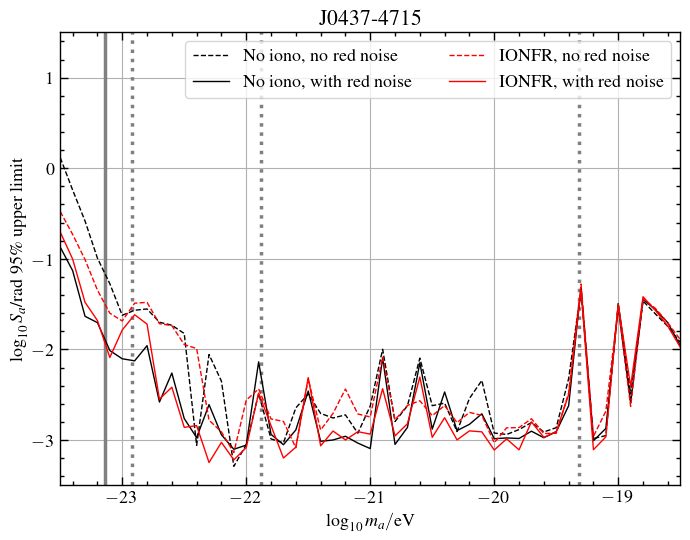

In [4]:
l10ma = np.arange(5,56)*0.1 -24
PSRNS=['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
for psrn in PSRNS:
    fig,ax = plt.subplots(figsize=(8,6))
    ax.grid()
    ax.set_xlim(-23.5,-18.5)
    ymin = -3.5
    ymax = 1.5
    plot_timescales(ax,ymin,ymax,annotate=False)
    plt.ylim(ymin,ymax)
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_NORED"] , 'k--' , label="No iono, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_RED"] ,'k-', label="No iono, with red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_NORED"] ,'r--', label="IONFR, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_RED"] ,'r-', label="IONFR, with red noise" , lw=1 )
    except:
        pass
    plt.title(psrn)
    ax.legend(ncol=2)



    plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    plt.ylabel(r"$\log_{10}S_a$/rad 95\% upper limit")

    plt.savefig("spl_"+psrn+".jpg",bbox_inches='tight')
    if psrn !="J0437-4715":
        plt.close()